# Ford GoBike System Dateset
## by Ahmad ALMosallam


Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from requests import get
from zipfile import ZipFile
from io import StringIO, BytesIO
from timeit import default_timer as timer
import os
%matplotlib inline

Loading the dataset

In [73]:
# get the data from the site
link = "https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip"
zipfile = get(link)
filename = link[40:-4]
with ZipFile(BytesIO(zipfile.content)) as file:
    file.extract(member = filename, path = './Data')

In [103]:
df = pd.read_csv('./Data/' + filename)

In [83]:
# Here are all rest data from the wesite https://s3.amazonaws.com/baywheels-data/index.html For 2020 year
links = ["https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip",
        "https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip"]
start = timer()
for link in links:
    zipfile = get(link)
    filename = link[40:-4]
    with ZipFile(BytesIO(zipfile.content)) as file:
        file.extract(member = filename, path = './Data')
        
end = timer()
print(end - start)

22.54542760000004


In [105]:
# Put all the data in one Dataframe
list_of_filenames = os.listdir('./Data')
for filename in list_of_filenames:
    d = pd.read_csv('./Data/' + filename)
    df = df.append(d)

C:\Users\ahmad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
print(df.shape)
df.head()

(1081806, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081806 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1081806 non-null  int64  
 1   start_time               1081806 non-null  object 
 2   end_time                 1081806 non-null  object 
 3   start_station_id         529401 non-null   float64
 4   start_station_name       531287 non-null   object 
 5   start_station_latitude   1081806 non-null  float64
 6   start_station_longitude  1081806 non-null  float64
 7   end_station_id           530322 non-null   float64
 8   end_station_name         532293 non-null   object 
 9   end_station_latitude     1081806 non-null  float64
 10  end_station_longitude    1081806 non-null  float64
 11  bike_id                  1081806 non-null  int64  
 12  user_type                1081806 non-null  object 
 13  rental_access_method     732127 non-null   

In [145]:
# rental_access_method had missing values so I dropped them
df = df.query("rental_access_method == 'app' or rental_access_method == 'clipper'")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610322 entries, 62531 to 432353
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             610322 non-null  int64  
 1   start_time               610322 non-null  object 
 2   end_time                 610322 non-null  object 
 3   start_station_id         130386 non-null  float64
 4   start_station_name       131619 non-null  object 
 5   start_station_latitude   610322 non-null  float64
 6   start_station_longitude  610322 non-null  float64
 7   end_station_id           130923 non-null  float64
 8   end_station_name         132197 non-null  object 
 9   end_station_latitude     610322 non-null  float64
 10  end_station_longitude    610322 non-null  float64
 11  bike_id                  610322 non-null  int64  
 12  user_type                610322 non-null  object 
 13  rental_access_method     610322 non-null  object 
 14  

In [125]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
192452,236,2020-02-29 19:49:18,2020-02-29 19:53:15,NaN,NaN,37.76413,-122.449309,NaN,NaN,37.769432,-122.453087,530703,Subscriber,app


In [127]:
# check for duplicate rows
df.duplicated().sum()

121781

In [129]:
# Drop duplicated rows
df = df.drop_duplicates()
print(df.shape)
print(df.duplicated().sum())

(610346, 14)
0


In [141]:
# Drop when the start latitude or the longitude are 0
df = df[df.start_station_longitude != 0]

<a id='distance'></a>

In [226]:
# This funtion gets the distance between the the start station and the end station
from math import sin, cos, sqrt, atan2, radians

def distance_between_startStation_endStation (lat1,lon1,lat2,lon2):
    #  approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance))

SyntaxError: invalid syntax (<ipython-input-226-689381567a23>, line 3)

In [133]:
# calculating the distance in each trip
df['distance'] = df.apply(lambda row: distance_between_startStation_endStation
                          (row['start_station_latitude'],row['start_station_longitude']
                            ,row['end_station_latitude'],row['end_station_longitude']),axis=1)
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,distance
273579,686,2020-01-22 20:15:20,2020-01-22 20:26:47,384.0,Jackson St at Polk St,37.79416,-122.421568,NaN,NaN,37.788412,-122.445991,495138,Subscriber,app,2240.0


<a id='drop'><a/>

In [228]:
# Drop some useless columns
df.drop(axis=1 , columns=['end_station_id' , 'end_station_name' , 'start_station_id' , 'start_station_name' , 'bike_id']
        , inplace=True)

In [229]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'user_type', 'rental_access_method',
       'distance'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610322 entries, 62531 to 432353
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             610322 non-null  int64  
 1   start_time               610322 non-null  object 
 2   end_time                 610322 non-null  object 
 3   start_station_latitude   610322 non-null  float64
 4   start_station_longitude  610322 non-null  float64
 5   end_station_latitude     610322 non-null  float64
 6   end_station_longitude    610322 non-null  float64
 7   bike_id                  610322 non-null  int64  
 8   user_type                610322 non-null  object 
 9   rental_access_method     610322 non-null  object 
 10  distance                 610322 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 55.9+ MB


In [154]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df['user_type'] = df['user_type'].astype('category')
df['rental_access_method'] = df['rental_access_method'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610322 entries, 62531 to 432353
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             610322 non-null  int64         
 1   start_time               610322 non-null  datetime64[ns]
 2   end_time                 610322 non-null  datetime64[ns]
 3   start_station_latitude   610322 non-null  float64       
 4   start_station_longitude  610322 non-null  float64       
 5   end_station_latitude     610322 non-null  float64       
 6   end_station_longitude    610322 non-null  float64       
 7   bike_id                  610322 non-null  int64         
 8   user_type                610322 non-null  category      
 9   rental_access_method     610322 non-null  category      
 10  distance                 610322 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(5), int64(2)
memory usage: 47.7

### What is the structure of your dataset?

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Rental Access Method (App or Clipper)

### What is/are the main feature(s) of interest in your dataset?

- User Type
- Rental Access Method
- Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- User Type
- Rental Access Method
- Trip Duration

## Univariate Exploration

In [149]:
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,distance
62531,1090,2020-03-04 20:23:55,2020-03-04 20:42:06,37.253050,-121.841617,37.270961,-121.830474,393666,Customer,app,2223.0
62532,1083,2020-03-04 20:24:35,2020-03-04 20:42:39,37.253062,-121.841621,37.270974,-121.830441,949847,Customer,app,2225.0
62533,2185,2020-03-13 19:05:49,2020-03-13 19:42:15,37.268030,-121.820941,37.363792,-121.919796,309589,Subscriber,app,13781.0
62534,3478,2020-03-07 16:49:06,2020-03-07 17:47:05,37.270289,-121.857498,37.252103,-121.859922,801073,Subscriber,app,2034.0
62535,270,2020-03-08 17:36:53,2020-03-08 17:41:23,37.270322,-121.861179,37.270571,-121.857307,504348,Subscriber,app,344.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610322 entries, 62531 to 432353
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             610322 non-null  int64         
 1   start_time               610322 non-null  datetime64[ns]
 2   end_time                 610322 non-null  datetime64[ns]
 3   start_station_latitude   610322 non-null  float64       
 4   start_station_longitude  610322 non-null  float64       
 5   end_station_latitude     610322 non-null  float64       
 6   end_station_longitude    610322 non-null  float64       
 7   bike_id                  610322 non-null  int64         
 8   user_type                610322 non-null  category      
 9   rental_access_method     610322 non-null  category      
 10  distance                 610322 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(5), int64(2)
memory usage: 47.7

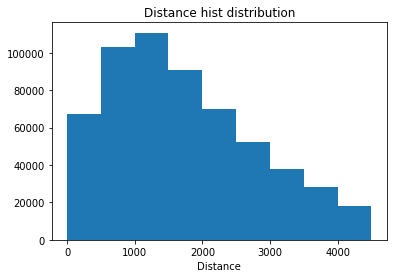

In [162]:
# Distance hist distribution
bin_edges = np.arange(0, (2133 + 1.5* 1247) +500, 500)
plt.hist(data = df, x ='distance', bins = bin_edges);
plt.title('Distance hist distribution')
plt.xlabel('Distance');

**Observation:** As showen above the distribution is roughly right skewed, and most the trip distance between 500 to 1500 meters

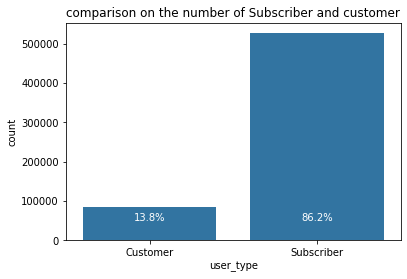

In [220]:
# Plot of the type of users
type_user = df.user_type.value_counts()
sb.countplot(data = df , x = 'user_type' , color = sb.color_palette()[0]);
plt.title('comparison on the number of Subscriber and customer');

locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_user[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, 50000, pct_string, ha = 'center', color = 'w');

**Observation:** From the plot above it`s clear that most of the clients are subscribers with 86.2% and for the customer 13.8.

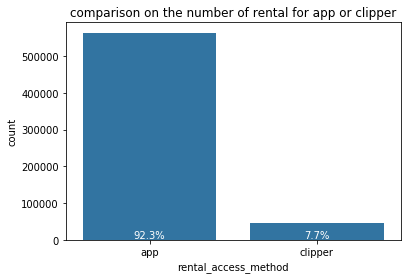

In [223]:
# Plot of the type of users
type_rental = df.rental_access_method.value_counts()
sb.countplot(data = df , x = 'rental_access_method' , color = sb.color_palette()[0]);
plt.title('comparison on the number of rental for app or clipper');

locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_rental[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, 5000, pct_string, ha = 'center', color = 'w');

**Observation:** From the plot above 92.3% of the clients uses the app to get a bike and 7.7% uses clipper.

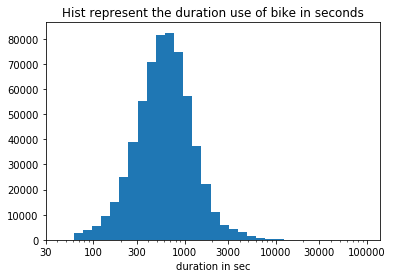

In [225]:
bin_edges = 10 ** np.arange(1.785330, 4.936358 + 0.1, 0.1)
ticks = [30,100,300,1000,3000,10000,30000,100000]
labls = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,labls);
plt.title('Hist represent the duration use of bike in seconds')
plt.xlabel('duration in sec');

**Observation:** From the plot above clearly most of the riders spend around 300 to 1000 sec in minute 5 to 17 minute.and there is small number of the riders spend 10,000 sec almost 3 hours.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

in the duration_sec I used log scale to get an uniform distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, none of the features were there any unusual.

I calculated the distance for each trip using the function [here](#distance). Also, dropped some useless columns [here](#drop)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!